## Business Problem Statement

The most important function of a bank is to accept deposits and provide loans using it. Bank attracts Credit risk by lending loans to its customers where Credit Risk is the probability of the counterparty defaulting on its loan. So it a pivotal function of a bank to seggregate the customers into good and bad credit applicants. So here, with the past year data, we'll classify the credit applicants using the ML algorithms. 

## Data Source

## Data variables

Annual Income, Home ownership, Employment length (in years), Loan intent, Loan grade, Loan amount, Interest rate, Loan status(0 is no default 1 is default), Loan amount, Percent Income, History default and Credit Length History

## Model Evaluation on test data (Accuracy)

## Most important features

## Code

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import tree
import matplotlib.pyplot as plt

In [29]:
df1=pd.read_csv("credit_risk_dataset (1).csv")

In [30]:
df=df1.copy()

In [31]:
df.shape

(32581, 12)

In [32]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [33]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [34]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [36]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [37]:
# for i in df.columns:
#     if df[i].dtype == 'object':
#         df[i] = pd.Categorical(df[i]).codes

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [39]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [40]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [41]:
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

In [42]:
df['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [44]:
for i in df1.columns:
    if df1[i].dtype == 'object':
        df1[i] = pd.Categorical(df1[i]).codes

In [45]:
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [19]:
df = pd.get_dummies(df,columns=['person_home_ownership' ,'loan_intent','loan_grade','cb_person_default_on_file'],dtype='int')
df.head()
# df = pd.get_dummies(df , columns = ['person_home_ownership' ,'loan_intent','loan_grade','cb_person_default_on_file'])

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1


In [20]:
df.isnull().sum()

person_age                           0
person_income                        0
person_emp_length                  895
loan_amnt                            0
loan_int_rate                     3116
loan_status                          0
loan_percent_income                  0
cb_person_cred_hist_length           0
person_home_ownership_MORTGAGE       0
person_home_ownership_OTHER          0
person_home_ownership_OWN            0
person_home_ownership_RENT           0
loan_intent_DEBTCONSOLIDATION        0
loan_intent_EDUCATION                0
loan_intent_HOMEIMPROVEMENT          0
loan_intent_MEDICAL                  0
loan_intent_PERSONAL                 0
loan_intent_VENTURE                  0
loan_grade_A                         0
loan_grade_B                         0
loan_grade_C                         0
loan_grade_D                         0
loan_grade_E                         0
loan_grade_F                         0
loan_grade_G                         0
cb_person_default_on_file

In [21]:
df.shape

(32581, 27)

In [22]:
df=df.dropna()

In [23]:
df.isnull().sum()

person_age                        0
person_income                     0
person_emp_length                 0
loan_amnt                         0
loan_int_rate                     0
loan_status                       0
loan_percent_income               0
cb_person_cred_hist_length        0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
loan_grade_A                      0
loan_grade_B                      0
loan_grade_C                      0
loan_grade_D                      0
loan_grade_E                      0
loan_grade_F                      0
loan_grade_G                      0
cb_person_default_on_file_N       0
cb_person_default_on_file_Y       0
dtype: int64

In [24]:
df.shape

(28638, 27)

In [25]:
df.isna().sum()

person_age                        0
person_income                     0
person_emp_length                 0
loan_amnt                         0
loan_int_rate                     0
loan_status                       0
loan_percent_income               0
cb_person_cred_hist_length        0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
loan_grade_A                      0
loan_grade_B                      0
loan_grade_C                      0
loan_grade_D                      0
loan_grade_E                      0
loan_grade_F                      0
loan_grade_G                      0
cb_person_default_on_file_N       0
cb_person_default_on_file_Y       0
dtype: int64

In [26]:
df.head()
df.shape

(28638, 27)

## EDA

In [131]:
df[['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate']].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000


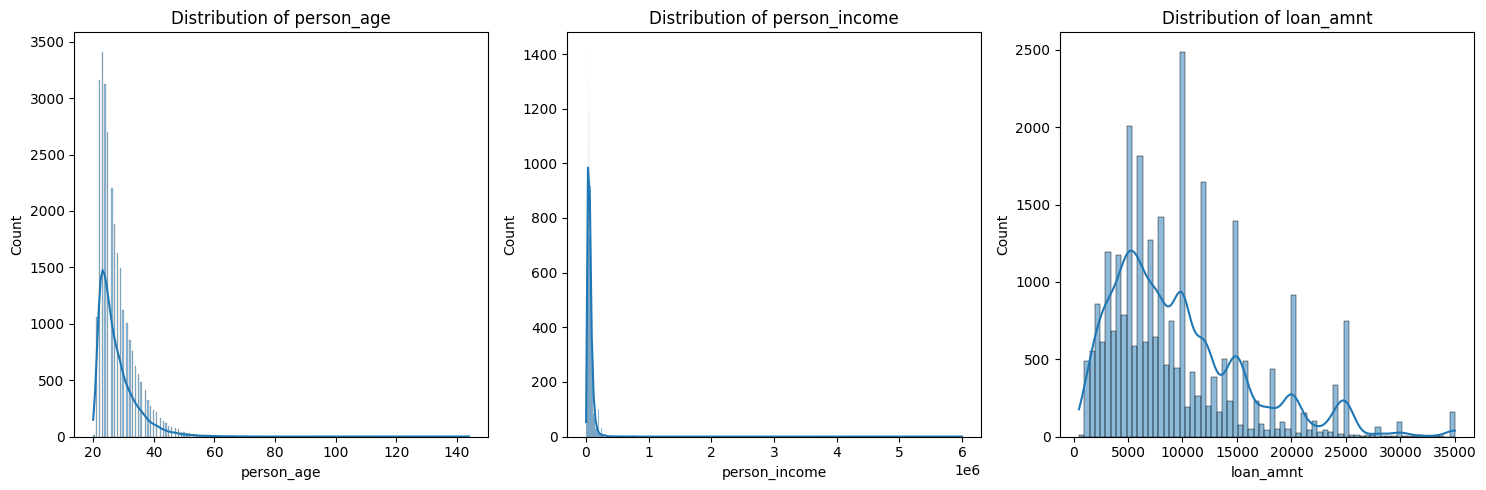

In [132]:
import seaborn as sns
# Assuming your DataFrame is named 'df'
columns_to_visualize = ['person_age', 'person_income', 'loan_amnt']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterate over columns and create histograms
for i, col in enumerate(columns_to_visualize):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

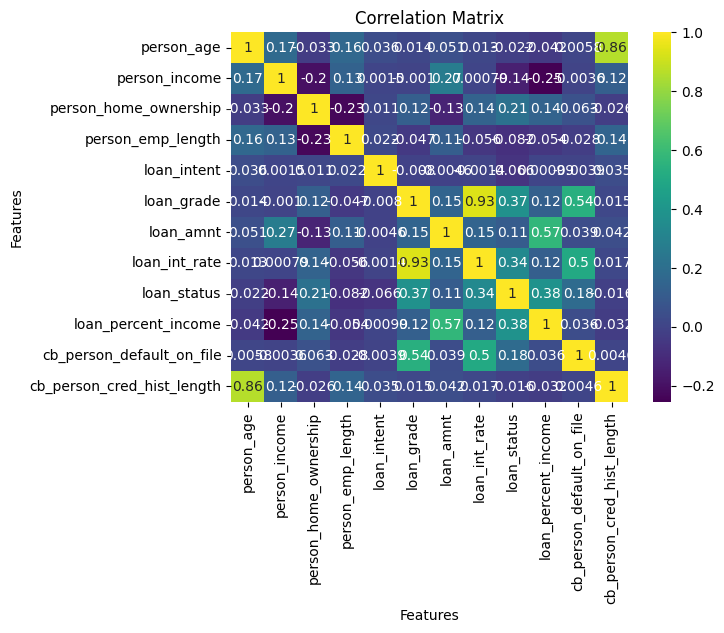

In [133]:
# Assuming you have a DataFrame named 'df'
# Replace 'df' with your actual DataFrame  

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Set the title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

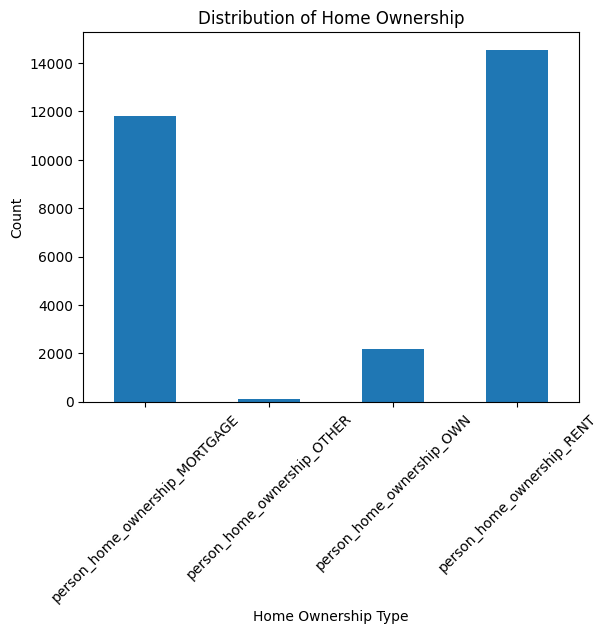

In [134]:
# Assuming 'df' is your DataFrame
df[['person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT']].sum().plot(kind='bar')

plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

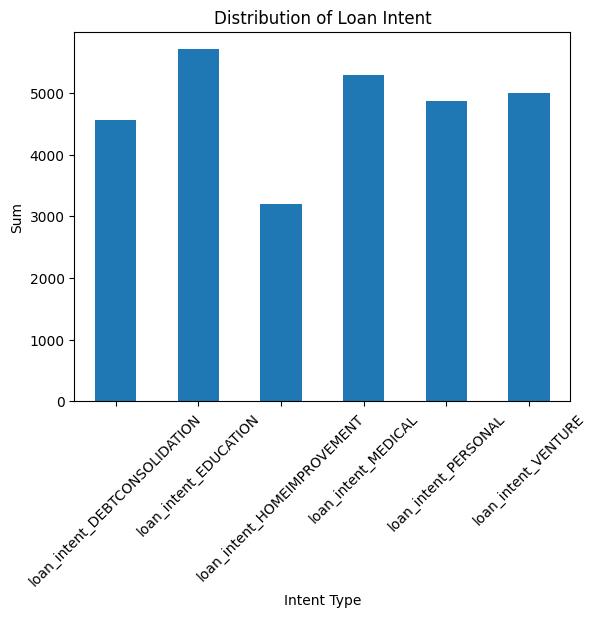

In [135]:
df[['loan_intent_DEBTCONSOLIDATION','loan_intent_EDUCATION','loan_intent_HOMEIMPROVEMENT','loan_intent_MEDICAL','loan_intent_PERSONAL','loan_intent_VENTURE' ]].sum().plot(kind='bar')
plt.title('Distribution of Loan Intent')
plt.xlabel('Intent Type')
plt.ylabel('Sum')
plt.xticks(rotation=45)
plt.show()

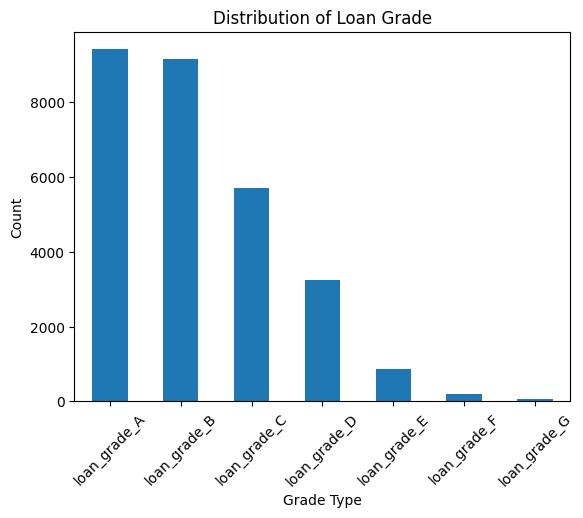

In [136]:
df[['loan_grade_A','loan_grade_B','loan_grade_C','loan_grade_D','loan_grade_E','loan_grade_F','loan_grade_G']].sum().plot(kind='bar')
plt.title('Distribution of Loan Grade')
plt.xlabel('Grade Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

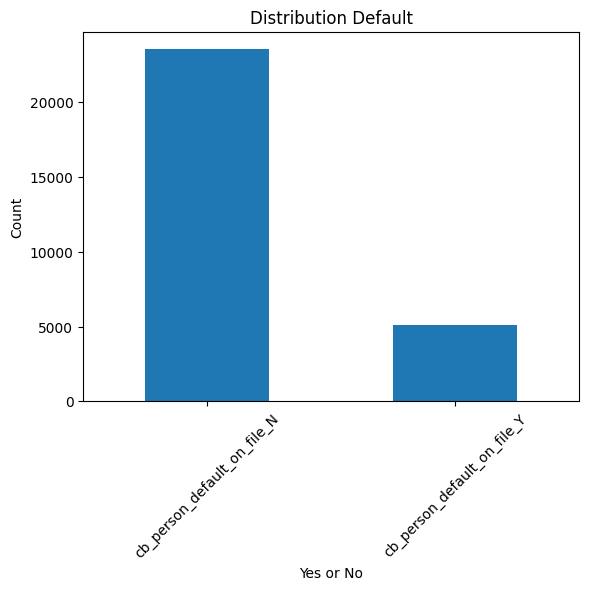

In [137]:
df[['cb_person_default_on_file_N','cb_person_default_on_file_Y']].sum().plot(kind='bar')
plt.title('Distribution Default')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

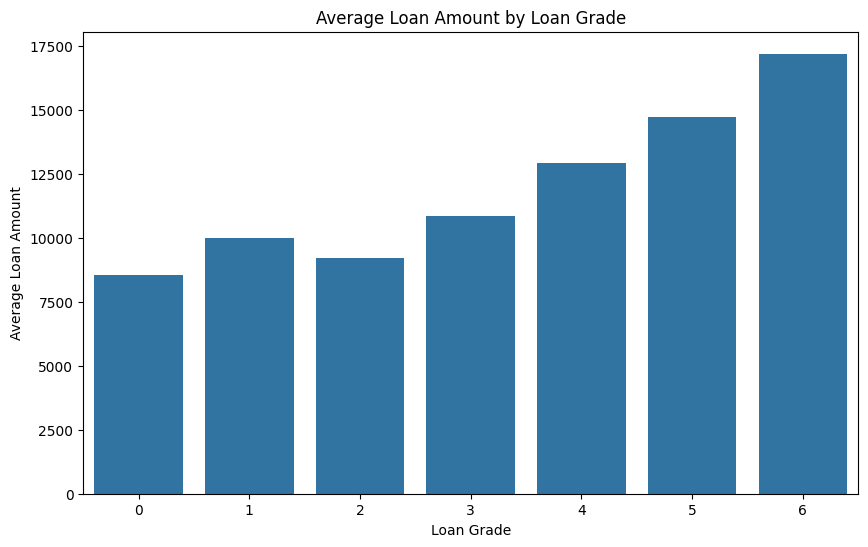

In [138]:
grouped_data = df1.groupby('loan_grade')['loan_amnt'].mean()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('Average Loan Amount by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.show()

1. Missing Values:

    person_emp_length: 895 missing values.
    loan_int_rate: 3,116 missing values.

2. Descriptive Statistics:

    Person Age: Median age is 26, with a max age of 144, which could be an outlier.
    Person Income: Mean income is $66,075, with significant variability (standard deviation: $61,983).
    Loan Amount: Median loan amount is $8,000, with a max of $35,000.
    Loan Interest Rate: Mean interest rate is around 11%.

3. Univariate Analysis:

    Distributions of person_age, person_income, and loan_amnt show a skew towards lower values, with a few large outliers.
    loan_percent_income values indicate that most borrowers allocate less than 23% of their income towards loan repayments.

4. Categorical Frequency Distribution:

    Most borrowers have rent as their home ownership status.
    Common loan intents include personal loans and medical loans.
    The dataset features loans across multiple grades (A to G), with the majority being B or C grade loans.
    The credit default flag (cb_person_default_on_file) shows that most people do not have a prior default (N).

5. Correlation Matrix:

    There is a moderate positive correlation between loan_amnt and loan_percent_income (0.37), but no strong correlations among most variables.

6. Loan Status Analysis:

    Income vs. Loan Status: Higher income borrowers are less likely to default.
    Loan Amount vs. Loan Status: Larger loan amounts tend to have a slightly higher association with defaults.

7. Groupby Analysis (Loan Grade vs. Loan Amount):

    Higher loan grades (A) are associated with smaller loan amounts, while lower grades (F and G) have larger average loan amounts.

## Model Creation

In [47]:
y=df['loan_status']
X=df.drop(columns=['loan_status'])

In [48]:
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26


In [140]:
y

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 28638, dtype: int64

In [141]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=142)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20046, 26), (8592, 26), (20046,), (8592,))

In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
scaler=StandardScaler()

In [144]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [146]:
y_test_pred=lr.predict(x_test)

In [147]:
## Taining and Test Score
print("Model Score in Training data : ",lr.score(x_train, y_train)*100)
print("Model Score in Testing data : ",lr.score(x_test, y_test)*100)

Model Score in Training data :  86.60580664471715
Model Score in Testing data :  87.1159217877095


In [148]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# confusion_matrix(y_train,y_train_pred)

In [149]:
confusion_matrix(y_test,y_test_pred)

array([[6436,  275],
       [ 832, 1049]], dtype=int64)

In [150]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      6711
           1       0.79      0.56      0.65      1881

    accuracy                           0.87      8592
   macro avg       0.84      0.76      0.79      8592
weighted avg       0.87      0.87      0.86      8592



## Decision Tree

In [151]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,7,8,9,10,12,14,16,18],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [153]:
treemodel=DecisionTreeClassifier()
# treemodel.fit(x_train,y_train)
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [154]:
cv.fit(x_train,y_train)

C:\Users\Manan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
390 fits failed out of a total of 1170.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
390 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Manan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Manan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Manan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 16,
                                       18],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [155]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 14,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [156]:
y_pred=cv.predict(x_test)

In [157]:
from sklearn.metrics import accuracy_score, classification_report

In [158]:
score=accuracy_score(y_pred,y_test)

In [159]:
score

0.9053770949720671

In [160]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      7190
           1       0.66      0.88      0.75      1402

    accuracy                           0.91      8592
   macro avg       0.82      0.90      0.85      8592
weighted avg       0.92      0.91      0.91      8592



In [161]:
from sklearn.tree import DecisionTreeClassifier
dts=DecisionTreeClassifier(criterion='gini',
                                           max_depth = 12,
                                           min_samples_leaf=25,
                                           min_samples_split=75)
dts.fit(x_train,y_train)
y_train_pred=dts.predict(x_train)
y_test_pred=dts.predict(x_test)

In [162]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     15724
           1       0.95      0.70      0.80      4322

    accuracy                           0.93     20046
   macro avg       0.94      0.84      0.88     20046
weighted avg       0.93      0.93      0.92     20046



## K-Nearest Neighbour

In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
knn=KNeighborsClassifier()

In [165]:
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)

In [166]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6711
           1       0.87      0.63      0.73      1881

    accuracy                           0.90      8592
   macro avg       0.88      0.80      0.83      8592
weighted avg       0.90      0.90      0.89      8592



In [167]:
print(classification_report(y_train,knn.predict(x_train)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     15724
           1       0.92      0.68      0.78      4322

    accuracy                           0.92     20046
   macro avg       0.92      0.83      0.86     20046
weighted avg       0.92      0.92      0.91     20046



## Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier as RF

In [169]:
# rf=RF(n_estimators=100,criterion ='entropy',
#  max_depth= 14,
#  max_features= 'sqrt',
#                                            min_samples_leaf=25,
#                                            min_samples_split=75)\
rf=RF(random_state=0)

In [170]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [171]:
# y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)

In [172]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6711
           1       0.97      0.72      0.83      1881

    accuracy                           0.94      8592
   macro avg       0.95      0.86      0.89      8592
weighted avg       0.94      0.94      0.93      8592

